In [1]:
%matplotlib inline

In [2]:
from collections import Counter
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from utils import ImageLoader
all_labels = ImageLoader.ALL_LABELS

##### Simple label counts

In [6]:
# All labels
c = Counter()
for l in all_labels:
    c.update(l)
print c.most_common()

[('primary', 37840), ('clear', 28203), ('agriculture', 12338), ('road', 8076), ('water', 7262), ('partly_cloudy', 7251), ('cultivation', 4547), ('habitation', 3662), ('haze', 2695), ('cloudy', 2330), ('bare_ground', 859), ('selective_logging', 340), ('artisinal_mine', 339), ('blooming', 332), ('slash_burn', 209), ('blow_down', 101), ('conventional_mine', 100)]


In [8]:
# number of labels per image
print Counter(map(len, all_labels)).most_common()

[(2, 19224), (3, 7260), (4, 7177), (5, 3701), (1, 1968), (6, 996), (7, 127), (8, 24), (9, 2)]


** Note: no images with 'primary' tag only **

In [9]:
# Single label images
c = Counter([l[0] for l in all_labels if len(l) == 1])
print c.most_common()

[('cloudy', 1968)]


In [13]:
# Double label images
dl = zip(*[[l[0], l[1]] for l in all_labels if len(l) == 2])
c = Counter(dl[0] + dl[1])
print c.most_common()

[('primary', 18991), ('clear', 13787), ('partly_cloudy', 3667), ('haze', 1484), ('cloudy', 286), ('water', 84), ('bare_ground', 79), ('agriculture', 67), ('conventional_mine', 2), ('road', 1)]


In [14]:
# Look at both labels together
c = Counter([(l[0], l[1]) for l in all_labels if len(l) == 2])
print c.most_common()

[(('clear', 'primary'), 13636), (('partly_cloudy', 'primary'), 3629), (('haze', 'primary'), 1469), (('cloudy', 'primary'), 257), (('bare_ground', 'clear'), 68), (('agriculture', 'clear'), 46), (('clear', 'water'), 36), (('cloudy', 'water'), 26), (('partly_cloudy', 'water'), 17), (('agriculture', 'partly_cloudy'), 15), (('bare_ground', 'haze'), 7), (('haze', 'water'), 5), (('bare_ground', 'partly_cloudy'), 4), (('agriculture', 'haze'), 3), (('agriculture', 'cloudy'), 3), (('conventional_mine', 'partly_cloudy'), 2), (('clear', 'road'), 1)]


#### Look at the NDVIs from some primary/clear images

In [4]:
cl_pr_ind = [x for x in range(len(all_labels)) if all_labels[x] == ['clear', 'primary']]
print len(cl_pr_ind)

13636


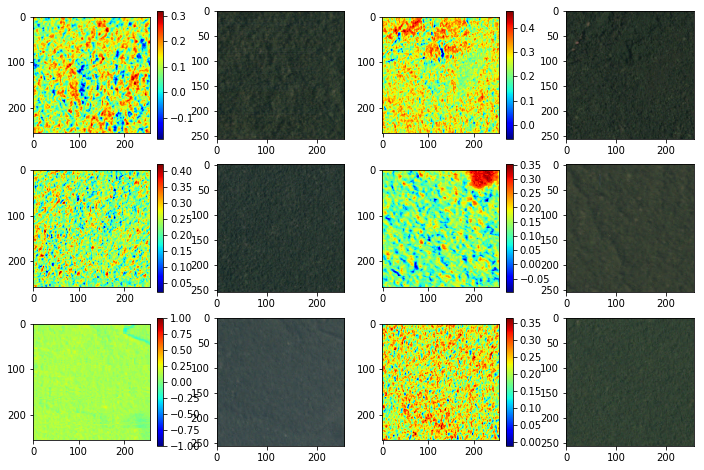

In [9]:
plt.figure(figsize=(12,8))
for i, ind in zip(range(6), cl_pr_ind[9:15]):
    plt.subplot(3,4,2*i+1)
    img = ImageLoader(ind)
    plt.imshow(img.ndvi, cmap='jet')
    plt.colorbar()
    plt.subplot(3,4,2*i+2)
    img = ImageLoader(ind)
    plt.imshow(img.jpg)

In [10]:
m = []
for i in range(100):
    img = ImageLoader(i)
    m.append(img.image.max())

In [6]:
cl_pr_ind[:3]

[2, 3, 13]

In [10]:
pc_pr_ind = [x for x in range(len(all_labels)) if all_labels[x] == ['partly_cloudy', 'primary']]
print len(pc_pr_ind)

3629


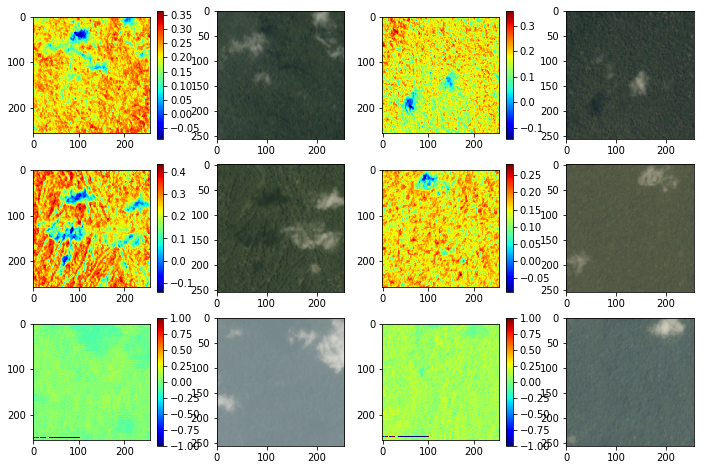

In [11]:
plt.figure(figsize=(12,8))
for i, ind in zip(range(6), pc_pr_ind[9:15]):
    plt.subplot(3,4,2*i+1)
    img = ImageLoader(ind)
    plt.imshow(img.ndvi, cmap='jet')
    plt.colorbar()
    plt.subplot(3,4,2*i+2)
    img = ImageLoader(ind)
    plt.imshow(img.jpg)

In [15]:
s = img.image.tostring()

In [16]:
len(s)

2097152

In [17]:
img.image.shape

(256, 256, 4)

In [19]:
np.log2(len(s))

21.0

In [20]:
s[:10]

'\xcd\xcc\xcc\xcc\xcc\xdc\xb6?33'

In [24]:
img = ImageLoader(5023)

ValueError: invalid TIFF file

In [25]:
all_labels[0]

['haze', 'primary']

In [27]:
weather_labels = set(['clear', 'haze', 'cloudy', 'partly_cloudy'])

In [30]:
Counter([len(set(x).intersection(weather_labels)) for x in all_labels])

Counter({1: 40479})